In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
from copy import deepcopy
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.ticker import ScalarFormatter

In [5]:
#ESTE DOCUMENTO TODO OK
epsilon=0.001

In [6]:
#formato unificado de gráficas
plt.rcParams['figure.figsize']=11,7.1
plt.rcParams['font.size']=28
plt.rcParams['lines.linewidth']=2.1
plt.rcParams['text.usetex']=True

In [7]:
#X-axis, different values of coupling constant
g=np.arange(0,2,0.01)
#Y-axis, different values of renormalized bias epsilon_r
epsilon_r_p1_M1=np.load("epsilon_r_p1_M1.npy")
epsilon_r_p1_M10=np.load("epsilon_r_p1_M10.npy")
epsilon_r_p1_M30=np.load("epsilon_r_p1_M30.npy")
epsilon_r_p1_M60=np.load("epsilon_r_p1_M60.npy")
epsilon_r_p1_M100=np.load("epsilon_r_p1_M100.npy")
epsilon_r_p1_M200=np.load("epsilon_r_p1_M200.npy")
epsilon_r_p1_M500=np.load("epsilon_r_p1_M500.npy")
epsilon_r_p1_M1000=np.load("epsilon_r_p1_M1000.npy")
#Y-axis, different values of the difference of Energies between 1st and 2nd param
deltaE_gs_M1=np.load("deltaE_gs_M1.npy")
deltaE_gs_M10=np.load("deltaE_gs_M10.npy")
deltaE_gs_M30=np.load("deltaE_gs_M30.npy")
deltaE_gs_M60=np.load("deltaE_gs_M60.npy")
deltaE_gs_M100=np.load("deltaE_gs_M100.npy")
deltaE_gs_M200=np.load("deltaE_gs_M200.npy")
deltaE_gs_M500=np.load("deltaE_gs_M500.npy")
deltaE_gs_M1000=np.load("deltaE_gs_M1000.npy")
#Y-axis, different values of mean value of sigma_z
sigma_z_p1_M1=np.load("sigma_z_p1_M1.npy")
sigma_z_p1_M10=np.load("sigma_z_p1_M10.npy")
sigma_z_p1_M30=np.load("sigma_z_p1_M30.npy")
sigma_z_p1_M60=np.load("sigma_z_p1_M60.npy")
sigma_z_p1_M100=np.load("sigma_z_p1_M100.npy")
sigma_z_p1_M200=np.load("sigma_z_p1_M200.npy")
sigma_z_p1_M500=np.load("sigma_z_p1_M500.npy")
sigma_z_p1_M1000=np.load("sigma_z_p1_M1000.npy")

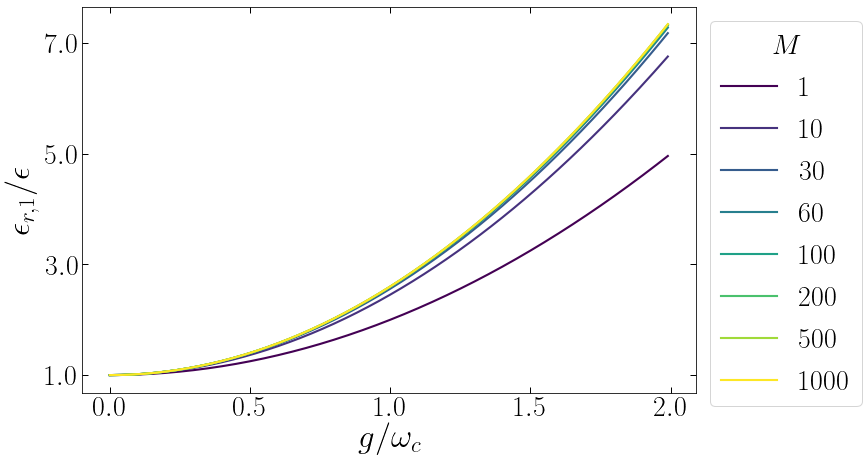

In [48]:
cmap = plt.get_cmap('viridis')
epss=[epsilon_r_p1_M1,epsilon_r_p1_M10,epsilon_r_p1_M30,epsilon_r_p1_M60,epsilon_r_p1_M100,epsilon_r_p1_M200,epsilon_r_p1_M500,epsilon_r_p1_M1000]
labels=["$1$","$10$","$30$","$60$","$100$","$200$","$500$","$1000$"]
colors = iter(cmap(np.linspace(0, 1, len(epss))))

for i in range (len(epss)):
    plt.plot(g,epss[i]/epsilon,label=labels[i],c=next(colors))

plt.tick_params(top=True,bottom=True,right=True,left=True, direction="in",width=1,length=6)#,pad=15 para separar los ejes
plt.xlabel('$g/\omega_c$',fontdict={'fontsize':33,'color':'k'})#,pad=15 para separar el label
plt.ylabel('$\epsilon_{r,1}/\epsilon$',fontdict={'fontsize':33,'color':'k'})
plt.yticks(ticks=[1.0,3.0,5.0,7.0],labels=["$1.0$","$3.0$","$5.0$","$7.0$"])
plt.legend(bbox_to_anchor=(1,1),title="$M$")
plt.savefig('epsilon_r_p1.pdf',bbox_inches='tight')
plt.show()


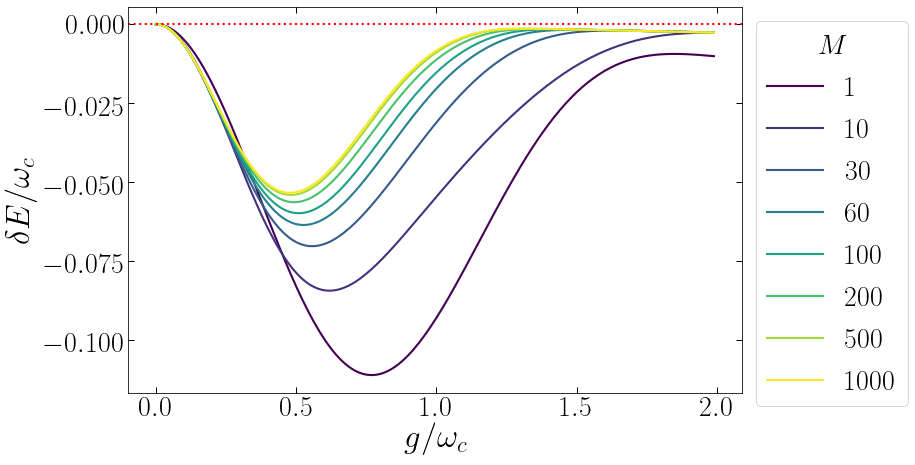

In [49]:
cmap = plt.get_cmap('viridis')
delenergies=[deltaE_gs_M1,deltaE_gs_M10,deltaE_gs_M30,deltaE_gs_M60,deltaE_gs_M100,deltaE_gs_M200,deltaE_gs_M500,deltaE_gs_M1000]
labels=["$1$","$10$","$30$","$60$","$100$","$200$","$500$","$1000$"]
colors = iter(cmap(np.linspace(0, 1, len(delenergies))))

for i in range (len(delenergies)):
    plt.plot(g,delenergies[i],label=labels[i],c=next(colors))

plt.tick_params(top=True,bottom=True,right=True,left=True, direction="in",width=1,length=6)
plt.xlabel('$g/\omega_c$',fontdict={'fontsize':33,'color':'k'})
plt.ylabel('$\delta E /\omega_c$',fontdict={'fontsize':33,'color':'k'})
plt.axhline(0,c="r",ls="dotted")
plt.legend(bbox_to_anchor=(1,1),title="$M$")
plt.savefig('deltaE_gs.pdf',bbox_inches='tight')
plt.show()

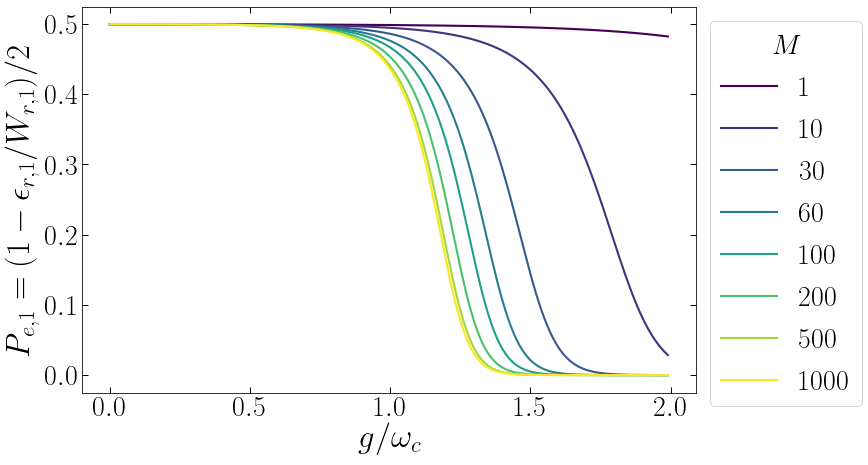

In [50]:
#create Pe
Pe_p1_M1=(1+sigma_z_p1_M1)/2
Pe_p1_M10=(1+sigma_z_p1_M10)/2
Pe_p1_M30=(1+sigma_z_p1_M30)/2
Pe_p1_M60=(1+sigma_z_p1_M60)/2
Pe_p1_M100=(1+sigma_z_p1_M100)/2
Pe_p1_M200=(1+sigma_z_p1_M200)/2
Pe_p1_M500=(1+sigma_z_p1_M500)/2
Pe_p1_M1000=(1+sigma_z_p1_M1000)/2

cmap = plt.get_cmap('viridis')
Pes=[Pe_p1_M1,Pe_p1_M10,Pe_p1_M30,Pe_p1_M60,Pe_p1_M100,Pe_p1_M200,Pe_p1_M500,Pe_p1_M1000]
labels=["$1$","$10$","$30$","$60$","$100$","$200$","$500$","$1000$"]
colors = iter(cmap(np.linspace(0, 1, len(Pes))))

for i in range (len(Pes)):
    plt.plot(g,Pes[i],label=labels[i],c=next(colors))

plt.tick_params(top=True,bottom=True,right=True,left=True, direction="in",width=1,length=6)
plt.xlabel('$g/\omega_c$',fontdict={'fontsize':33,'color':'k'})
plt.ylabel('$P_{e,1}=(1-\epsilon_{r,1}/W_{r,1})/2$',fontdict={'fontsize':33,'color':'k'})
plt.legend(bbox_to_anchor=(1,1),title="$M$")
plt.savefig('Pe_p1.pdf',bbox_inches='tight')
plt.show()